In [ ]:
S%%HTML
<style type="text/css">
                                       
div.h2 {
    background-color: #3E5AE6;
    background-image: linear-gradient(120deg, #3E5AE6, #A37CE6);
    text-align: left;
    color: white;              
    padding:9px;
    padding-right: 100px; 
    font-size: 20px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 40px; 
}                                  
                                      
body {
  font-size: 12px;
}    
                                                                               
div.h3 {
    color: #3E5AE6; 
    font-size: 18px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
                                     
div.h4 {
    color: #159957;
    font-size: 15px; 
    margin-top: 20px; 
    margin-bottom: 8px;
}
                                         
span.note {
    font-size: 5; 
    color: gray; 
    font-style: italic;
}
                                        
hr {
    display: block; 
    color: gray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}
  
                                      
hr.light {
    display: block; 
    color: lightgray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}   
                                         
table.dataframe th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
}
                                       
table.dataframe td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
    text-align: center;
} 
                                         
table.rules th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
}
                                          
table.rules td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 13px;
    text-align: center;
} 
                                      
                                      
table.rules tr.best
{
    color: green;
}    
                                       
.output { 
    align-items: center; 
}
                                      
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}                                          
                                                                                                                                                                                                                                      
</style>  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U vega_datasets notebook vega

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 439 kB 35.7 MB/s 
     |████████████████████████████████| 1.3 MB 49.9 MB/s 
     |████████████████████████████████| 423 kB 70.5 MB/s 
     |████████████████████████████████| 9.8 MB 54.2 MB/s 
     |████████████████████████████████| 346 kB 53.3 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 273 kB 72.6 MB/s 
     |████████████████████████████████| 133 kB 72.8 MB/s 
     |████████████████████████████████| 71 kB 224 kB/s 
     |████████████████████████████████| 107 kB 65.9 MB/s 
     |████████████████████████████████| 121 kB 74.7 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 1.6 MB 60.2 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
  Attempting uninstall: traitlets
    Fou

In [ ]:
!pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.6 MB/s 


In [ ]:
%env JOBLIB_TEMP_FOLDER=/tmp
!pip install pyspark

env: JOBLIB_TEMP_FOLDER=/tmp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 59.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=9c7f0e1fb6b7891cec494e290a2fa4b947e5eb6a4e2c7fc30264017922b937c7
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 8)
import os
import gc
import ujson as json
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot

init_notebook_mode(connected=True)

import altair as alt
from altair.vega import v5
from IPython.display import HTML
alt.renderers.enable('notebook')

from IPython.display import HTML
from IPython.display import Image
from IPython.display import display
from IPython.core.display import display
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') 
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
%config InlineBackend.figure_format = 'svg'  
th_props = [('font-size', '13px'), ('background-color', 'white'), ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", props=th_props)]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

DATA_PATH = '/content/drive/MyDrive/MovieDataset'

In [ ]:
# using ideas from this kernel: https://www.kaggle.com/notslush/altair-visualization-2018-stackoverflow-survey
def prepare_altair():
    """
    Helper function to prepare altair for working.
    """

    vega_url = 'https://cdn.jsdelivr.net/npm/vega@' + v5.SCHEMA_VERSION
    vega_lib_url = 'https://cdn.jsdelivr.net/npm/vega-lib'
    vega_lite_url = 'https://cdn.jsdelivr.net/npm/vega-lite@' + alt.SCHEMA_VERSION
    vega_embed_url = 'https://cdn.jsdelivr.net/npm/vega-embed@3'
    noext = "?noext"
    
    paths = {
        'vega': vega_url + noext,
        'vega-lib': vega_lib_url + noext,
        'vega-lite': vega_lite_url + noext,
        'vega-embed': vega_embed_url + noext
    }
    
    workaround = f"""    requirejs.config({{
        baseUrl: 'https://cdn.jsdelivr.net/npm/',
        paths: {paths}
    }});
    """
    
    return workaround
    
def add_autoincrement(render_func):
    # Keep track of unique <div/> IDs
    cache = {}
    def wrapped(chart, id="vega-chart", autoincrement=True):
        if autoincrement:
            if id in cache:
                counter = 1 + cache[id]
                cache[id] = counter
            else:
                cache[id] = 0
            actual_id = id if cache[id] == 0 else id + '-' + str(cache[id])
        else:
            if id not in cache:
                cache[id] = 0
            actual_id = id
        return render_func(chart, id=actual_id)
    # Cache will stay outside and 
    return wrapped
           
@add_autoincrement
def render(chart, id="vega-chart"):
    """
    Helper function to plot altair visualizations.
    """
    chart_str = """
    <div id="{id}"></div><script>
    require(["vega-embed"], function(vg_embed) {{
        const spec = {chart};     
        vg_embed("#{id}", spec, {{defaultStyle: true}}).catch(console.warn);
        console.log("anything?");
    }});
    console.log("really...anything?");
    </script>
    """
    return HTML(
        chart_str.format(
            id=id,
            chart=json.dumps(chart) if isinstance(chart, dict) else chart.to_json(indent=None)
        )
    )

# setting up altair
workaround = prepare_altair()
HTML("".join((
    "<script>",
    workaround,
    "</script>",
)))

In [ ]:
print('Data Files in Directory')
print(os.listdir(DATA_PATH))

Data Files in Directory
['links.csv', 'links_small.csv', 'credits.csv', 'keywords.csv', 'movies_metadata.csv', 'ratings.csv', 'ratings_small.csv']


In [ ]:
ratings = pd.read_csv(DATA_PATH +'/ratings.csv')
links = pd.read_csv(DATA_PATH+'/links.csv')
metadata = pd.read_csv(DATA_PATH+'/movies_metadata.csv')

In [ ]:
# Function that I wrote to print all relevant infos in dataset
import io

def get_df_info(df):
    display(df.head(3))
    buf = io.StringIO()
    df.info(buf=buf)
    info = buf.getvalue().split('\n')[-2]
    display(f'Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}')
    display('Data Types')
    df_types = df.dtypes
    df_types = pd.DataFrame({'Column':df_types.index, 'Type':df_types.values})
    display(df_types) 
    display(info)
    missing = df.isnull().sum().sort_values(ascending=False)
    display('Missing Values')
    if missing.values.sum() == 0:
        display('No Missing Values')
    else:
        missing = missing[missing > 0]
        missing = pd.DataFrame({'Column' : missing.index, 'Missing Values' : missing.values})
        display(missing)

In [ ]:
get_df_info(ratings)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


'Number of Rows: 26024289, Number of Columns: 4'

'Data Types'

,Column,Type
0,userId,int64
1,movieId,int64
2,rating,float64
3,timestamp,int64


'memory usage: 794.2 MB'

'Missing Values'

'No Missing Values'

In [ ]:
get_df_info(links)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


'Number of Rows: 45843, Number of Columns: 3'

'Data Types'

,Column,Type
0,movieId,int64
1,imdbId,int64
2,tmdbId,float64


'memory usage: 1.0 MB'

'Missing Values'

,Column,Missing Values
0,tmdbId,219


In [ ]:
get_df_info(metadata)

,adult,belongs_to_collection,budget,genres,...,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",...,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",...,Grumpier Old Men,False,6.5,92.0


'Number of Rows: 45466, Number of Columns: 24'

'Data Types'

,Column,Type
0,adult,object
1,belongs_to_collection,object
2,budget,object
3,genres,object
4,homepage,object
5,id,object
6,imdb_id,object
7,original_language,object
8,original_title,object
9,overview,object


'memory usage: 8.3+ MB'

'Missing Values'

,Column,Missing Values
0,belongs_to_collection,40972
1,homepage,37684
2,tagline,25054
3,overview,954
4,poster_path,386
5,runtime,263
6,status,87
7,release_date,87
8,imdb_id,17
9,original_language,11


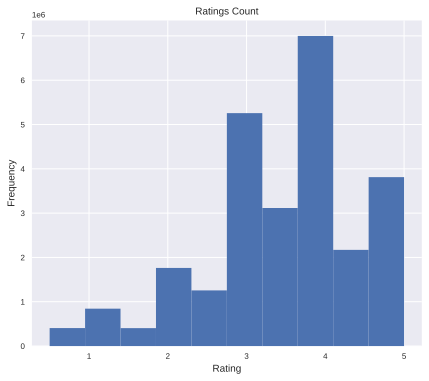

In [ ]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.hist(ratings['rating'], bins=10);
plt.title('Ratings Count', size=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show();

In [ ]:
df_aux = ratings['movieId'].value_counts().reset_index().head(10).rename(columns={'index': 'movieId', 'movieId': 'count'})
df_aux['movieId'] = df_aux['movieId'].astype(str)

In [ ]:
render(alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('movieId:N', axis=alt.Axis(title='Movie ID'), sort=list(df_aux['movieId'].values)),
    y=alt.Y('count:Q', axis=alt.Axis(title='Total Count')),
    tooltip=['movieId', 'count']
).properties(title='Movie Count', height=300, width=800).interactive())

In [ ]:
# Get the Movie on metadata
def get_movie_metadata(movieId):
    metadata['imdb_id'] = metadata['imdb_id'].astype('category')
    imdb_id = links[links['movieId'] == movieId]
    imdb_id = imdb_id.imdbId.values[0]
    if len(str(imdb_id)) == 7:
        movie_rated = metadata[metadata['imdb_id'] == 'tt'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 6:
        movie_rated = metadata[metadata['imdb_id'] == 'tt0'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 5:
        movie_rated = metadata[metadata['imdb_id'] == 'tt00'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 4:
        movie_rated = metadata[metadata['imdb_id'] == 'tt000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 3:
        movie_rated = metadata[metadata['imdb_id'] == 'tt0000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 2:
        movie_rated = metadata[metadata['imdb_id'] == 'tt00000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 1:
        movie_rated = metadata[metadata['imdb_id'] == 'tt000000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    else:
        pass
# Get Movie List
def get_movie(df):
    movieIdIdx = df['movieId'].values.astype(int)
    df_aux_b = pd.DataFrame({'title': ['aaa'], 
                           'overview': ['bbb'], 
                           'vote_average': [1.7], 
                           'release_date': ['1999-01-01']
        })
    for i in movieIdIdx:
        df_aux_b = df_aux_b.append(get_movie_metadata(i), ignore_index=True)

    df_aux_b.drop(0, inplace=True)
    df_aux_b['release_date'] = df_aux_b['release_date'].apply(lambda x : x.split('-')[0])
    df_aux_b['release_date'] = df_aux_b['release_date'].astype(int)
    df_aux_b.rename(columns={'release_date' : 'release_year'}, inplace=True)
    return df_aux_b.reset_index(drop=True)

In [ ]:
df_movies = get_movie(df_aux)
df_movies

,title,overview,vote_average,release_year
0,Forrest Gump,A man with a low IQ has accomplished great thi...,8.2,1994
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,8.5,1994
2,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8.3,1994
3,The Silence of the Lambs,"FBI trainee, Clarice Starling ventures into a ...",8.1,1991
4,The Matrix,"Set in the 22nd century, The Matrix tells the ...",7.9,1999
5,Star Wars,Princess Leia is captured and held hostage by ...,8.1,1977
6,Jurassic Park,A wealthy entrepreneur secretly creates a them...,7.6,1993
7,Schindler's List,The true story of how businessman Oskar Schind...,8.3,1993
8,Braveheart,"Enraged at the slaughter of Murron, his new br...",7.7,1995
9,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,1995


In [ ]:
df_aux = ratings['movieId'].value_counts().reset_index().head(1001).rename(columns={'index': 'movieId', 'movieId': 'count'})
df_aux['movieId'] = df_aux['movieId'].astype(str)
df_aux = get_movie(df_aux)
get_df_info(df_aux)

,title,overview,vote_average,release_year
0,Forrest Gump,A man with a low IQ has accomplished great thi...,8.2,1994
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,8.5,1994
2,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8.3,1994


'Number of Rows: 1000, Number of Columns: 4'

'Data Types'

,Column,Type
0,title,object
1,overview,object
2,vote_average,float64
3,release_year,int64


'memory usage: 31.4+ KB'

'Missing Values'

'No Missing Values'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


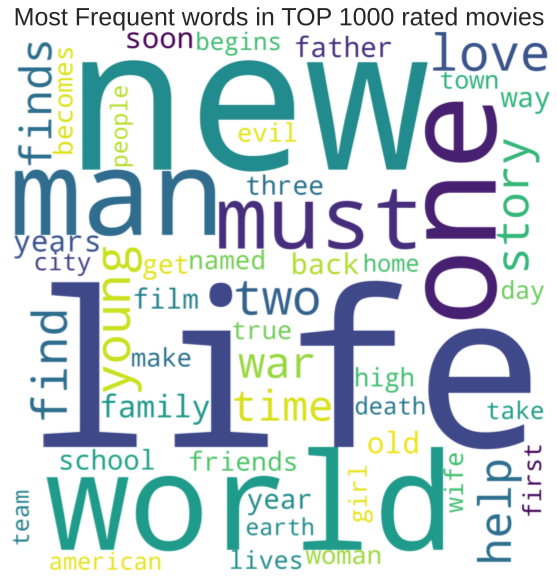

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

df_aux['overview'] = df_aux.overview.apply(lambda x : x.lower())
df_aux['overview'] = df_aux.overview.apply(lambda x : tokenizer.tokenize(x))
df_aux['overview'] = df_aux.overview.apply(lambda x : [w for w in x if w not in stop_words])
df_aux['overview'] = df_aux.overview.apply(lambda x : ' '.join(x))

word_count = df_aux.overview.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False)
word_count = pd.DataFrame({'word' : word_count.index, 'count': word_count.values})
# Plot the WordCloud
d = {}
for a, x in word_count.values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white',
                      max_words = 50,
                      width = 2000,
                      height = 2000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent words in TOP 1000 rated movies', fontsize = 25)
plt.show();

In [ ]:
del ratings, df_aux, df_movies
gc.collect()

1664

In [ ]:
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator

sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
data_schema = StructType([
    StructField('userId', IntegerType(), False),
    StructField('movieId', IntegerType(), False),
    StructField('rating', FloatType(), False),
    StructField('timestamp',IntegerType(), False)
])
final_stat = spark.read.csv(
    '/content/drive/MyDrive/MovieDataset/ratings.csv', header=True, schema=data_schema
).cache()

ratings = (final_stat.select(
    'userId',
    'movieId',
    'rating'
)).cache()

In [ ]:
(training, test) = ratings.randomSplit([0.7, 0.3], seed=42)

In [ ]:
als = ALS(
          rank=30,
          maxIter=4, 
          regParam=0.1,
          userCol='userId', 
          itemCol='movieId', 
          ratingCol='rating',
          coldStartStrategy='drop',
          implicitPrefs=False
         )
model = als.fit(training)

predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName='mae', labelCol='rating',
                                predictionCol='prediction')

mae = evaluator.evaluate(predictions)
print(f'MAE (Test) = {mae}')

MAE (Test) = 0.6575873920390197


In [ ]:
model.recommendForAllUsers(1).show(5)

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|     1|[{101862, 6.585939}]|
|     2|[{164937, 4.963108}]|
|     3| [{158832, 4.19634}]|
|     4|[{164937, 5.639908}]|
|     5|[{164937, 6.23275...|
+------+--------------------+
only showing top 5 rows



In [ ]:
get_movie_metadata(156589)

,title,overview,vote_average,release_date
0,Hate Story 2,The movie is a revenge thriller with Surveen C...,4.5,2014-07-18


In [ ]:
model.recommendForAllItems(1).show(5)

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|      1|[{172953, 5.41259...|
|      2|[{212857, 5.07832...|
|      3|[{179759, 5.21454...|
|      4|[{41755, 4.6923423}]|
|      5|[{179759, 5.21794...|
+-------+--------------------+
only showing top 5 rows

